<a href="https://colab.research.google.com/github/Cristvillanueva/Simulaci-n-II/blob/main/Aproximaci%C3%B3n%20al%20valor%20de%20pi%20con%20metodolog%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximación a $\pi$ por medio de Monte Carlo Acierto y Error (Hit or Miss) con METODOLOGÍA

\begin{equation*}
\begin{aligned}
 I = \int_0^1 \sqrt{1-x^2} \quad dx
\end{aligned}
\end{equation*}

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [3]:
def funcion(x):
    return math.sqrt(1-x**2)

In [4]:
def experimentos(n):
  a=0
  b=1
  c = 2
  aciertos = 0
  area=[]
  ensayos=[]
  for i in range(1,n+1):
      u1=(random.random())
      u2=(random.random())
      x = (b-a)*u1+a
      g_x = funcion(x)
      if g_x > c*u2:
        aciertos += 1
      ensayos.append(i)
      area.append(c*(b-a)*aciertos*4/i)
  return area

In [5]:
exp = experimentos(2000)

In [6]:
np.mean(exp)

3.2616722305195536

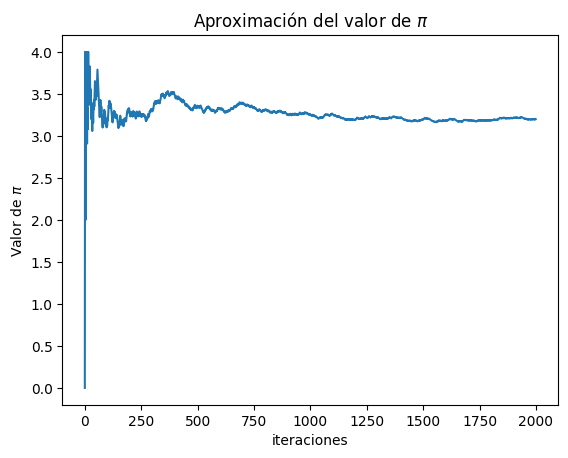

In [7]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('Valor de $\pi$')
plt.title('Aproximación del valor de $\pi$')
plt.show()

**PASO 8**. Replique el modelo.

In [8]:
def valor_pi(repeticiones):
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(2000)))
    return Area

In [9]:
N=50
simulacion = valor_pi(N)

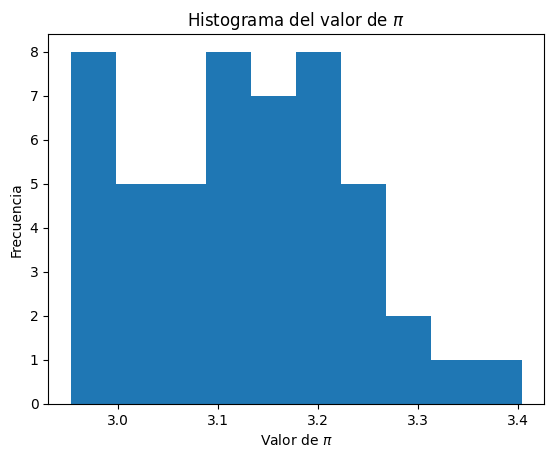

In [10]:
plt.hist(simulacion)
plt.xlabel('Valor de $\pi$')
plt.ylabel('Frecuencia')
plt.title('Histograma del valor de $\pi$')
plt.show()

**PASO 9**. Calcule la media del valor de $\pi$ y su desviación
estándar.

In [11]:
media = np.mean(simulacion)
var = np.var(simulacion)
desv = np.std(simulacion)

**PASO 10**. Halle el intervalo de confianza del valor de $\pi$ con un nivel de confianza del $95 \%$.

In [12]:
from scipy.stats import norm
alpha = 1 - 0.95
z_alpha_2 = norm.ppf(1-alpha / 2)
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N))
l_superior = media + z_alpha_2 * (desv / math.sqrt(N))
print("Entonces: ", l_inferior, "< \u03BC <", l_superior)

Entonces:  3.097161122849478 < μ < 3.156139602522499
